## UK schools cluster analysis

This notebook explores some potential correlations between the features of our UK school datasets and then performs an [agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) saving the labeling results on disk for further visualisation.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster  import KMeans, AgglomerativeClustering

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline  

### Load schools features

Load UK schools dataset cleaned with [cleaning.ipynb](/project/uk-schools-clustering/cleaning.ipynb) and sample 5 data points.

In [62]:
schools = pd.read_csv('/project/uk-schools-clustering/data/derived/2016-2017_england.csv')

In [76]:
schools.head(5)
schools.columns.tolist()

['urn',
 'name',
 'english first language',
 'girls on roll',
 'english not first language',
 'total income pp',
 'total pupils on roll',
 'on free meal',
 'idaci score',
 'teacher headcount',
 'boys on roll',
 'mean salary fte',
 'total expenditure pp',
 'income score',
 'empl score',
 'perc pupils meeting reading standard',
 'perc pupils meeting math standard',
 'perc pupils meeting grammar standard',
 'perc pupils meeting writing standard',
 'avg reading scaled score',
 'avg grammar scaled score',
 'avg math scaled score']

### Describe dataset

In [64]:
schools.describe()

,urn,english first language,girls on roll,english not first language,total income pp,total pupils on roll,on free meal,idaci score,teacher headcount,boys on roll,...,total expenditure pp,income score,empl score,perc pupils meeting reading standard,perc pupils meeting math standard,perc pupils meeting grammar standard,perc pupils meeting writing standard,avg reading scaled score,avg grammar scaled score,avg math scaled score
count,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,...,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000,7940.000000
mean,115127.058942,187.597733,143.216247,50.330227,4.956919,291.907179,19.874181,0.177044,15.919773,148.690932,...,4.974790,0.141924,0.117558,0.740366,0.763241,0.786617,0.775000,104.479219,106.028086,104.255038
std,9517.978234,103.893017,80.647899,90.464302,0.994317,163.665806,20.551354,0.133490,8.621675,84.098239,...,1.026957,0.102965,0.076813,0.139206,0.144220,0.127736,0.120463,3.113659,2.936253,2.942249
min,100000.000000,0.000000,0.000000,0.000000,3.305000,26.000000,0.000000,0.005000,4.000000,0.000000,...,1.097000,0.005000,0.004000,0.170000,0.120000,0.170000,0.000000,90.000000,93.000000,91.000000
25%,107086.750000,111.000000,91.000000,3.000000,4.329000,190.000000,5.000000,0.071000,10.000000,94.000000,...,4.336000,0.063000,0.061000,0.650000,0.680000,0.710000,0.710000,102.000000,104.000000,102.000000
50%,114555.500000,168.000000,121.000000,13.000000,4.774000,244.000000,13.000000,0.134000,14.000000,125.000000,...,4.779500,0.108000,0.094000,0.750000,0.780000,0.800000,0.790000,104.000000,106.000000,104.000000
75%,121544.750000,249.000000,196.000000,55.000000,5.344000,405.000000,28.000000,0.259250,21.000000,204.000000,...,5.380000,0.195250,0.154250,0.840000,0.870000,0.880000,0.860000,107.000000,108.000000,106.000000
max,142523.000000,1566.000000,966.000000,1488.000000,35.425000,1933.000000,345.000000,0.783000,147.000000,967.000000,...,36.093000,0.636000,0.557000,1.000000,1.000000,1.000000,1.000000,115.000000,117.000000,115.000000


### Select only numerical features

In [65]:
X=np.array(schools[schools.columns[-19:]]).astype(float)
header = schools.columns

### Show correlation matrix

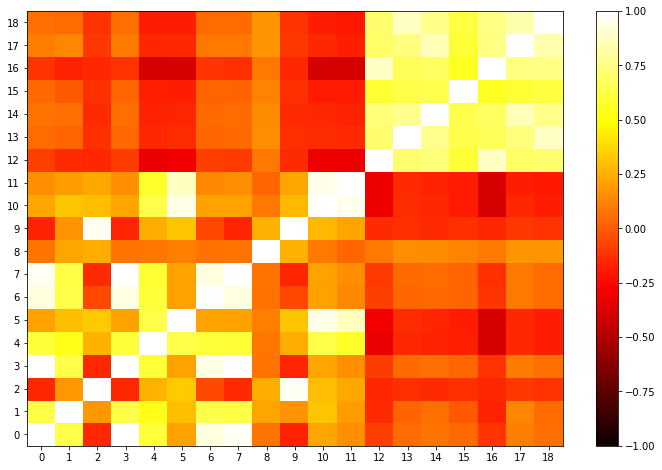

In [66]:
fig = plt.figure(figsize=(12,8))
correlationMatrix = np.corrcoef(X, rowvar=0)

plt.pcolor(correlationMatrix, cmap = 'hot', vmin=-1, vmax=1)
plt.colorbar()

plt.yticks(np.arange(0.5, 19), range(0,19))
plt.xticks(np.arange(0.5, 19), range(0,19))

plt.show()

### Preprocess data and standard scaling

In [67]:
scaler  = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### Show names of numerical features

In [68]:
header = schools.columns[-19:]
header

Index(['girls on roll', 'english not first language', 'total income pp',
       'total pupils on roll', 'on free meal', 'idaci score',
       'teacher headcount', 'boys on roll', 'mean salary fte',
       'total expenditure pp', 'income score', 'empl score',
       'perc pupils meeting reading standard',
       'perc pupils meeting math standard',
       'perc pupils meeting grammar standard',
       'perc pupils meeting writing standard', 'avg reading scaled score',
       'avg grammar scaled score', 'avg math scaled score'],
      dtype='object')

## K-Means clustering

Perform an agglomerative clustering and visualise a 3D scatter plot for 3 features. Namely:
* IDACI score
* Number of pupils on free meal
* Number of pupils which english is not the first language

In [69]:
features = ['idaci score', 'on free meal', 'english not first language']

Text(0.5,0,'english not first language')

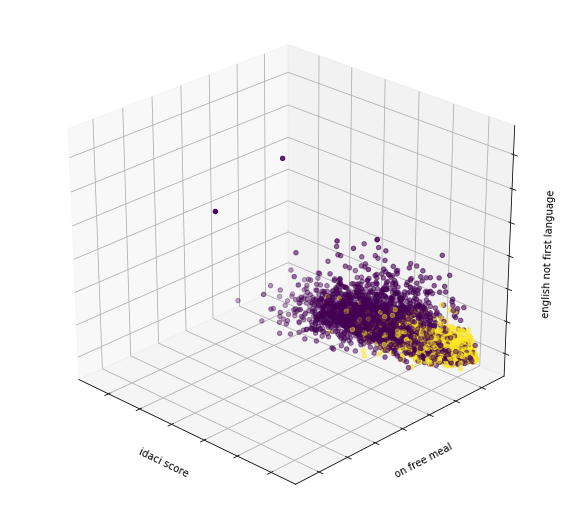

In [70]:
estimator = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='cosine')

x_index = header.tolist().index(features[0])
y_index = header.tolist().index(features[1])
z_index = header.tolist().index(features[2])

fig = plt.figure(1, figsize=(8, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)

plt.cla()
estimator.fit(X_scaled)
labels = estimator.labels_

ax.scatter(X_scaled[:, x_index], X_scaled[:, y_index], X_scaled[:, z_index], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

### Save features with cluster labels

Save result of clustering to disk for further visualisation in a Plotly dash.

In [71]:
X_with_labels = np.insert(X, 19, labels, axis=1)
column_names = header.tolist()
column_names.append('cluster')
clustered_schools = pd.DataFrame(X_with_labels, columns=column_names)
clustered_schools['cluster'] = clustered_schools.cluster.astype(int)
clustered_schools

,girls on roll,english not first language,total income pp,total pupils on roll,on free meal,idaci score,teacher headcount,boys on roll,mean salary fte,total expenditure pp,income score,empl score,perc pupils meeting reading standard,perc pupils meeting math standard,perc pupils meeting grammar standard,perc pupils meeting writing standard,avg reading scaled score,avg grammar scaled score,avg math scaled score,cluster
0,136.0,105.0,8.176,276.0,16.0,0.051,20.0,140.0,46.053,8.319,0.014,0.011,0.88,0.92,0.92,0.92,107.0,109.0,107.0,0
1,226.0,236.0,6.444,446.0,58.0,0.128,27.0,220.0,45.328,6.293,0.088,0.058,0.64,0.75,0.76,0.75,101.0,105.0,104.0,0
2,177.0,213.0,7.191,390.0,55.0,0.309,26.0,213.0,39.253,6.644,0.180,0.118,0.78,0.93,0.87,0.82,106.0,112.0,110.0,0
3,207.0,70.0,5.630,437.0,36.0,0.284,28.0,230.0,42.305,5.700,0.225,0.175,0.82,0.78,0.69,0.67,106.0,106.0,105.0,0
4,160.0,229.0,7.526,359.0,62.0,0.507,22.0,199.0,46.462,7.911,0.367,0.247,0.85,0.91,0.88,0.79,106.0,108.0,107.0,0
5,136.0,92.0,6.581,228.0,29.0,0.192,17.0,92.0,44.398,6.856,0.121,0.083,0.81,0.81,0.78,0.70,107.0,105.0,107.0,0
6,189.0,301.0,8.492,439.0,70.0,0.281,26.0,250.0,46.255,8.408,0.168,0.100,0.68,0.77,0.77,0.77,103.0,107.0,104.0,0
7,197.0,220.0,5.539,438.0,25.0,0.090,24.0,241.0,46.384,5.649,0.120,0.072,0.80,0.78,0.85,0.80,107.0,109.0,106.0,1
8,205.0,187.0,7.180,448.0,55.0,0.412,26.0,243.0,41.158,7.090,0.191,0.112,0.93,0.93,0.92,0.86,111.0,112.0,109.0,0
9,238.0,170.0,6.360,468.0,58.0,0.193,23.0,230.0,46.060,6.276,0.113,0.070,0.75,0.85,0.93,0.88,106.0,110.0,106.0,0


In [72]:
clustered_schools.insert(loc=0, column='name', value=schools['name'])
clustered_schools.insert(loc=0, column='urn', value=schools['urn'])

In [73]:
clustered_schools.to_csv('/project/uk-schools-clustering/data/derived/2016-2017_england_clusters.csv', index=False)